<a href="https://colab.research.google.com/github/mayurshimbre123/mayurshimbre/blob/master/the_best_teams_of_EPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The best Football Teams of EPL
In the English Premier League, over the last decade or so, we have witnessed the rise of 6 football clubs - namely, Manchester United, Manchester City, Liverpool, Chelsea, Arsenal and Tottenham Hotspur - who have dominated other clubs (until 2016 when Leicester City FC won the league in a shock victory). Their fans have always vied for top honours and while different teams have won the league in different seasons, this is an attempt to look at EPL data from 2006-07 to 2017-18. I shall analyse the data to find which teams have been most successful  The data has been obtained from Kaggle https://www.kaggle.com/zaeemnalla/premier-league.
I will primarily be making extensive use of matplotlib and seaborn to create quality data visualisation as that was the prime motive . I hope it will help you to see your favourite team in much better light.

As a first step, let's upload our Jupyter to https://www.jovian.ai/ .

In [ ]:
project_name = "The best Football Teams of EPL" 

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

## Data Preparation and Cleaning
The data has 240 rows and 42 columns and gives a comprehensive view of the entire Premier League through the season 2007 to 2018. We do not need so much data so one needs to trim the data and that's what you are aabout to see in this section. Easily, the most lacklustre section of this project. Needless  to say, it is also the most important as we don't want any ugly surprises moving forward. 
Caveat: You will notice that the year 2008-09 is missing in the primed dataset. I shall leave you to think on it as nowhere in the ensuing code have I explicitly asked for it to be dropped. It was a surprising observation for me too. 

### The Imports

Let us begin by importing pandas, numpy and all such relevant libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
import seaborn as sns
%matplotlib inline

Now, we can import the data from the CSV file 'stats.csv' using the pandas method read_csv.

In [ ]:
stats_df=pd.read_csv('stats.csv')
stats_df.shape


(240, 42)

While which teams dominate the top tier of English football is common knowledge, let us check whether the data that we have validates our assumption. To this end we shall group all EPL teams and sort them according to their total wins in a descending order.

In [ ]:
team_stats_df=stats_df.groupby('team')[['wins','losses','goals','total_yel_card', 'total_red_card','total_scoring_att','ontarget_scoring_att','saves','clean_sheet','goals_conceded','own_goals','penalty_conceded','pen_goals_conceded','penalty_save']].sum()
team_stats_df.sort_values('wins',ascending=False)

,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,saves,clean_sheet,goals_conceded,own_goals,penalty_conceded,pen_goals_conceded,penalty_save
team,,,,,,,,,,,,,,
Manchester United,290.0,77.0,867.0,722.0,29.0,7200.0,2530.0,501.0,206.0,386.0,16.0,36.0,29.0,5.0
Chelsea,276.0,79.0,859.0,715.0,41.0,7882.0,2667.0,475.0,198.0,407.0,15.0,34.0,26.0,5.0
Manchester City,256.0,107.0,866.0,731.0,36.0,7175.0,2502.0,401.0,175.0,470.0,20.0,40.0,25.0,14.0
Arsenal,255.0,94.0,861.0,685.0,40.0,7339.0,2652.0,563.0,171.0,481.0,21.0,64.0,51.0,11.0
Liverpool,234.0,103.0,817.0,643.0,23.0,7868.0,2606.0,422.0,181.0,472.0,23.0,51.0,38.0,12.0
Tottenham Hotspur,228.0,116.0,764.0,689.0,27.0,7405.0,2532.0,507.0,141.0,535.0,18.0,50.0,38.0,7.0
Everton,185.0,130.0,652.0,673.0,31.0,6153.0,2086.0,552.0,146.0,526.0,25.0,48.0,32.0,10.0
West Ham United,127.0,181.0,498.0,744.0,31.0,5428.0,1708.0,645.0,105.0,624.0,17.0,64.0,45.0,14.0
Newcastle United,116.0,171.0,446.0,631.0,38.0,4803.0,1539.0,432.0,87.0,581.0,15.0,52.0,45.0,6.0


In [ ]:
top6_df_total=team_stats_df.sort_values('wins', ascending=False).head(6)
top6_df_total

,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,saves,clean_sheet,goals_conceded,own_goals,penalty_conceded,pen_goals_conceded,penalty_save
team,,,,,,,,,,,,,,
Manchester United,290.0,77.0,867.0,722.0,29.0,7200.0,2530.0,501.0,206.0,386.0,16.0,36.0,29.0,5.0
Chelsea,276.0,79.0,859.0,715.0,41.0,7882.0,2667.0,475.0,198.0,407.0,15.0,34.0,26.0,5.0
Manchester City,256.0,107.0,866.0,731.0,36.0,7175.0,2502.0,401.0,175.0,470.0,20.0,40.0,25.0,14.0
Arsenal,255.0,94.0,861.0,685.0,40.0,7339.0,2652.0,563.0,171.0,481.0,21.0,64.0,51.0,11.0
Liverpool,234.0,103.0,817.0,643.0,23.0,7868.0,2606.0,422.0,181.0,472.0,23.0,51.0,38.0,12.0
Tottenham Hotspur,228.0,116.0,764.0,689.0,27.0,7405.0,2532.0,507.0,141.0,535.0,18.0,50.0,38.0,7.0


Voila! It is clear that the empirical evidence from our 10-year dataset upholds the primary assumption.

While we have grouped the data by teams, we still have to deal with the huge chunk of data related to every other team that does not feature in the TOP 6. So, let us try to filter to them out. 

In [ ]:
manu_df=stats_df[stats_df.team=='Manchester United']
manc_df=stats_df[stats_df.team=='Manchester City']
liv_df=stats_df[stats_df.team=='Liverpool']
che_df=stats_df[stats_df.team=='Chelsea']
ars_df=stats_df[stats_df.team=='Arsenal']
tot_df=stats_df[stats_df.team=='Tottenham Hotspur']

In [ ]:
manu_df=manu_df[['team','wins','losses','goals','total_yel_card', 'total_red_card','total_scoring_att','ontarget_scoring_att','saves','clean_sheet','goals_conceded','own_goals','penalty_conceded','pen_goals_conceded','penalty_save','season']]
manu_df.set_index('season', inplace=True)
manu_df=manu_df.dropna()
manu_df

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,saves,clean_sheet,goals_conceded,own_goals,penalty_conceded,pen_goals_conceded,penalty_save
season,,,,,,,,,,,,,,,
2006-2007,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,2.0,16.0,27.0,1.0,5.0,3.0,2.0
2007-2008,Manchester United,27.0,5.0,80.0,51.0,2.0,696.0,260.0,2.0,21.0,22.0,0.0,1.0,1.0,0.0
2009-2010,Manchester United,27.0,7.0,86.0,49.0,4.0,695.0,221.0,0.0,19.0,28.0,0.0,2.0,2.0,0.0
2010-2011,Manchester United,23.0,4.0,78.0,56.0,3.0,618.0,212.0,0.0,15.0,37.0,1.0,6.0,5.0,0.0
2011-2012,Manchester United,28.0,5.0,89.0,51.0,1.0,646.0,243.0,0.0,20.0,33.0,2.0,3.0,2.0,1.0
2012-2013,Manchester United,28.0,5.0,86.0,57.0,1.0,561.0,213.0,1.0,13.0,43.0,4.0,0.0,0.0,0.0
2013-2014,Manchester United,19.0,12.0,64.0,66.0,3.0,526.0,183.0,103.0,13.0,43.0,1.0,4.0,3.0,0.0
2014-2015,Manchester United,20.0,8.0,62.0,64.0,5.0,512.0,180.0,100.0,11.0,37.0,1.0,4.0,3.0,1.0
2015-2016,Manchester United,19.0,10.0,49.0,65.0,1.0,430.0,144.0,90.0,18.0,35.0,2.0,2.0,2.0,0.0


In [ ]:
manc_df=manc_df[['team','wins','losses','goals','total_yel_card', 'total_red_card','total_scoring_att','ontarget_scoring_att','saves','clean_sheet','goals_conceded','own_goals','penalty_conceded','pen_goals_conceded','penalty_save','season']]
manc_df.set_index('season', inplace=True)
manc_df=manc_df.dropna()
manc_df

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,saves,clean_sheet,goals_conceded,own_goals,penalty_conceded,pen_goals_conceded,penalty_save
season,,,,,,,,,,,,,,,
2006-2007,Manchester City,11.0,18.0,29.0,59.0,4.0,454.0,147.0,0.0,14.0,44.0,2.0,3.0,2.0,1.0
2007-2008,Manchester City,15.0,13.0,45.0,50.0,4.0,423.0,143.0,4.0,11.0,53.0,2.0,4.0,2.0,2.0
2009-2010,Manchester City,18.0,7.0,73.0,49.0,2.0,526.0,195.0,0.0,11.0,45.0,1.0,7.0,5.0,2.0
2010-2011,Manchester City,21.0,9.0,60.0,71.0,5.0,546.0,177.0,2.0,18.0,33.0,0.0,4.0,3.0,1.0
2011-2012,Manchester City,28.0,5.0,93.0,51.0,5.0,738.0,250.0,1.0,17.0,29.0,2.0,3.0,2.0,1.0
2012-2013,Manchester City,23.0,6.0,66.0,62.0,3.0,660.0,231.0,1.0,18.0,34.0,2.0,2.0,1.0,1.0
2013-2014,Manchester City,27.0,6.0,102.0,72.0,1.0,673.0,238.0,88.0,16.0,37.0,2.0,1.0,1.0,0.0
2014-2015,Manchester City,24.0,7.0,83.0,77.0,2.0,670.0,229.0,93.0,14.0,38.0,3.0,4.0,3.0,1.0
2015-2016,Manchester City,19.0,10.0,71.0,61.0,0.0,615.0,210.0,86.0,16.0,41.0,1.0,1.0,1.0,0.0


In [ ]:
liv_df=liv_df[['team','wins','losses','goals','total_yel_card', 'total_red_card','total_scoring_att','ontarget_scoring_att','saves','clean_sheet','goals_conceded','own_goals','penalty_conceded','pen_goals_conceded','penalty_save','season']]
liv_df.set_index('season',inplace=True)
liv_df=liv_df.dropna()
liv_df

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,saves,clean_sheet,goals_conceded,own_goals,penalty_conceded,pen_goals_conceded,penalty_save
season,,,,,,,,,,,,,,,
2006-2007,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,1.0,20.0,27.0,0.0,1.0,1.0,0.0
2007-2008,Liverpool,21.0,4.0,67.0,45.0,1.0,686.0,214.0,0.0,18.0,28.0,2.0,5.0,4.0,1.0
2009-2010,Liverpool,18.0,11.0,61.0,55.0,5.0,642.0,189.0,0.0,17.0,35.0,2.0,4.0,3.0,1.0
2010-2011,Liverpool,17.0,14.0,59.0,63.0,2.0,582.0,205.0,0.0,14.0,44.0,3.0,8.0,7.0,0.0
2011-2012,Liverpool,14.0,14.0,47.0,53.0,5.0,667.0,207.0,0.0,12.0,40.0,3.0,5.0,4.0,1.0
2012-2013,Liverpool,16.0,9.0,71.0,54.0,2.0,739.0,232.0,0.0,16.0,43.0,1.0,5.0,4.0,1.0
2013-2014,Liverpool,26.0,6.0,101.0,54.0,1.0,651.0,258.0,107.0,10.0,50.0,6.0,4.0,3.0,1.0
2014-2015,Liverpool,18.0,12.0,52.0,66.0,3.0,590.0,192.0,93.0,14.0,48.0,2.0,3.0,1.0,2.0
2015-2016,Liverpool,16.0,10.0,63.0,61.0,3.0,629.0,202.0,81.0,11.0,50.0,1.0,3.0,2.0,1.0


In [ ]:
che_df=che_df[['team','wins','losses','goals','total_yel_card', 'total_red_card','total_scoring_att','ontarget_scoring_att','saves','clean_sheet','goals_conceded','own_goals','penalty_conceded','pen_goals_conceded','penalty_save','season']]
che_df.set_index('season', inplace=True)
che_df=che_df.dropna()
che_df

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,saves,clean_sheet,goals_conceded,own_goals,penalty_conceded,pen_goals_conceded,penalty_save
season,,,,,,,,,,,,,,,
2006-2007,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,4.0,22.0,24.0,1.0,3.0,2.0,1.0
2007-2008,Chelsea,25.0,3.0,65.0,63.0,5.0,605.0,199.0,4.0,21.0,26.0,0.0,3.0,3.0,0.0
2009-2010,Chelsea,27.0,6.0,103.0,54.0,5.0,834.0,288.0,0.0,18.0,32.0,1.0,5.0,4.0,1.0
2010-2011,Chelsea,21.0,9.0,69.0,59.0,1.0,745.0,244.0,0.0,15.0,33.0,1.0,3.0,2.0,1.0
2011-2012,Chelsea,18.0,10.0,65.0,74.0,4.0,671.0,224.0,1.0,10.0,46.0,1.0,6.0,4.0,0.0
2012-2013,Chelsea,22.0,7.0,75.0,51.0,3.0,626.0,212.0,6.0,14.0,39.0,2.0,1.0,0.0,0.0
2013-2014,Chelsea,25.0,6.0,71.0,57.0,3.0,692.0,229.0,96.0,18.0,27.0,2.0,1.0,1.0,0.0
2014-2015,Chelsea,26.0,3.0,73.0,73.0,4.0,564.0,210.0,90.0,17.0,32.0,1.0,3.0,3.0,0.0
2015-2016,Chelsea,12.0,12.0,59.0,58.0,5.0,526.0,173.0,122.0,9.0,53.0,2.0,4.0,3.0,1.0


In [ ]:
ars_df=ars_df[['team','wins','losses','goals','total_yel_card', 'total_red_card','total_scoring_att','saves','ontarget_scoring_att','clean_sheet','goals_conceded','own_goals','penalty_conceded','pen_goals_conceded','penalty_save','season']]
ars_df.set_index('season',inplace=True)
ars_df=ars_df.dropna()
ars_df

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,saves,ontarget_scoring_att,clean_sheet,goals_conceded,own_goals,penalty_conceded,pen_goals_conceded,penalty_save
season,,,,,,,,,,,,,,,
2006-2007,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,6.0,226.0,12.0,35.0,1.0,3.0,3.0,0.0
2007-2008,Arsenal,24.0,3.0,74.0,55.0,3.0,627.0,0.0,208.0,15.0,31.0,2.0,4.0,3.0,1.0
2009-2010,Arsenal,23.0,9.0,83.0,56.0,1.0,660.0,3.0,233.0,14.0,41.0,2.0,7.0,5.0,2.0
2010-2011,Arsenal,19.0,8.0,72.0,65.0,6.0,654.0,0.0,238.0,13.0,43.0,1.0,9.0,6.0,2.0
2011-2012,Arsenal,21.0,10.0,74.0,64.0,4.0,637.0,0.0,236.0,13.0,49.0,5.0,4.0,3.0,1.0
2012-2013,Arsenal,21.0,7.0,72.0,42.0,5.0,597.0,0.0,205.0,14.0,37.0,0.0,6.0,4.0,1.0
2013-2014,Arsenal,24.0,7.0,68.0,53.0,4.0,523.0,116.0,213.0,17.0,41.0,2.0,6.0,5.0,1.0
2014-2015,Arsenal,22.0,7.0,71.0,68.0,2.0,610.0,96.0,227.0,13.0,36.0,1.0,3.0,3.0,0.0
2015-2016,Arsenal,20.0,7.0,65.0,40.0,4.0,571.0,118.0,211.0,18.0,36.0,3.0,1.0,1.0,0.0


In [ ]:
tot_df=tot_df[['team','wins','losses','goals','total_yel_card', 'total_red_card','total_scoring_att','saves','clean_sheet','ontarget_scoring_att','goals_conceded','own_goals','penalty_conceded','pen_goals_conceded','penalty_save','season']]
tot_df.set_index('season',inplace=True)
tot_df=tot_df.dropna()
tot_df

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,saves,clean_sheet,ontarget_scoring_att,goals_conceded,own_goals,penalty_conceded,pen_goals_conceded,penalty_save
season,,,,,,,,,,,,,,,
2006-2007,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,11.0,6.0,184.0,54.0,2.0,7.0,6.0,0.0
2007-2008,Tottenham Hotspur,11.0,14.0,66.0,51.0,1.0,555.0,0.0,9.0,195.0,61.0,1.0,1.0,1.0,0.0
2009-2010,Tottenham Hotspur,21.0,10.0,67.0,58.0,1.0,681.0,4.0,13.0,226.0,41.0,0.0,9.0,6.0,3.0
2010-2011,Tottenham Hotspur,16.0,8.0,55.0,51.0,2.0,657.0,0.0,8.0,191.0,46.0,1.0,6.0,4.0,2.0
2011-2012,Tottenham Hotspur,20.0,9.0,66.0,43.0,3.0,701.0,0.0,14.0,230.0,41.0,1.0,1.0,1.0,0.0
2012-2013,Tottenham Hotspur,21.0,8.0,66.0,55.0,2.0,681.0,0.0,9.0,241.0,46.0,1.0,3.0,3.0,0.0
2013-2014,Tottenham Hotspur,21.0,11.0,55.0,66.0,4.0,588.0,106.0,14.0,192.0,51.0,3.0,5.0,3.0,1.0
2014-2015,Tottenham Hotspur,19.0,12.0,58.0,79.0,4.0,527.0,119.0,9.0,171.0,53.0,2.0,7.0,5.0,1.0
2015-2016,Tottenham Hotspur,19.0,6.0,69.0,72.0,0.0,659.0,89.0,13.0,252.0,35.0,3.0,2.0,2.0,0.0


The individual data frames can be collated to create a dataframe for the Top 6 teams. To that end, we shall use the concat method available in pandas.

In [ ]:
top6=[manu_df, manc_df, liv_df, che_df, ars_df, tot_df]
top6_df=pd.concat(top6)
top6_df

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,saves,clean_sheet,goals_conceded,own_goals,penalty_conceded,pen_goals_conceded,penalty_save
season,,,,,,,,,,,,,,,
2006-2007,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,2.0,16.0,27.0,1.0,5.0,3.0,2.0
2007-2008,Manchester United,27.0,5.0,80.0,51.0,2.0,696.0,260.0,2.0,21.0,22.0,0.0,1.0,1.0,0.0
2009-2010,Manchester United,27.0,7.0,86.0,49.0,4.0,695.0,221.0,0.0,19.0,28.0,0.0,2.0,2.0,0.0
2010-2011,Manchester United,23.0,4.0,78.0,56.0,3.0,618.0,212.0,0.0,15.0,37.0,1.0,6.0,5.0,0.0
2011-2012,Manchester United,28.0,5.0,89.0,51.0,1.0,646.0,243.0,0.0,20.0,33.0,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-2014,Tottenham Hotspur,21.0,11.0,55.0,66.0,4.0,588.0,192.0,106.0,14.0,51.0,3.0,5.0,3.0,1.0
2014-2015,Tottenham Hotspur,19.0,12.0,58.0,79.0,4.0,527.0,171.0,119.0,9.0,53.0,2.0,7.0,5.0,1.0
2015-2016,Tottenham Hotspur,19.0,6.0,69.0,72.0,0.0,659.0,252.0,89.0,13.0,35.0,3.0,2.0,2.0,0.0


In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "shambobasuthakur/the-big-6-of-epl" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/shambobasuthakur/the-big-6-of-epl


'https://jovian.ml/shambobasuthakur/the-big-6-of-epl'

## Exploratory Analysis and Visualization
### Here begins the most capitvating section of the entire project.

As one of the aims of the project we wish to determine which team has been most successful across the stipulated time period. 
One of the methods that leapt to my mind was to plot their wins on the season axis.

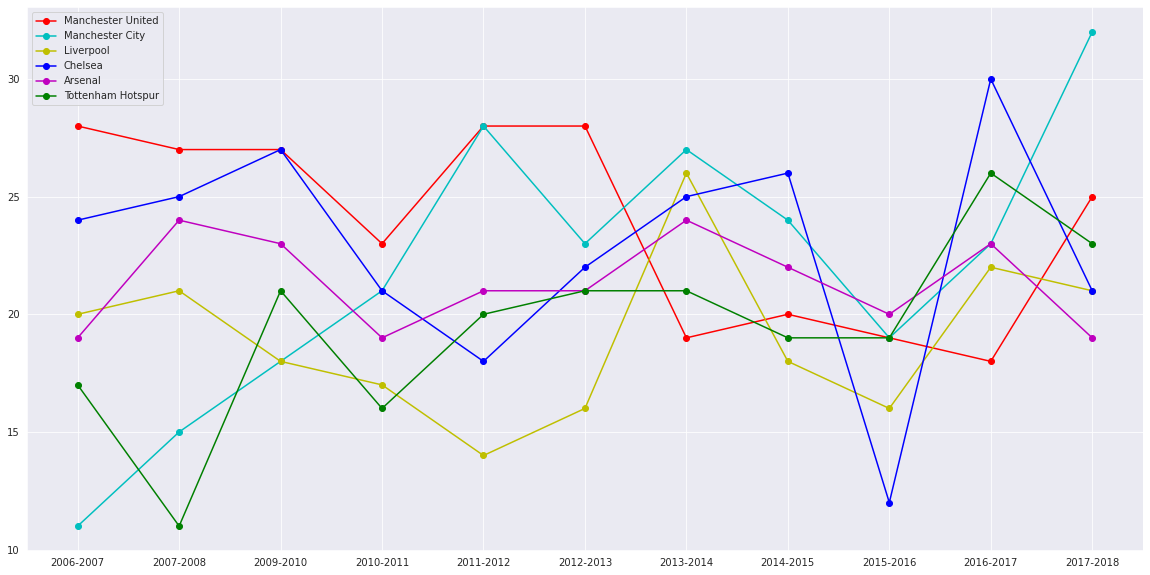

In [ ]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.plot(manu_df.wins, 'r-o')
plt.plot(manc_df.wins, 'c-o')
plt.plot(liv_df.wins, 'y-o')
plt.plot(che_df.wins, 'b-o')
plt.plot(ars_df.wins, 'm-o')
plt.plot(tot_df.wins, 'g-o')
plt.legend(['Manchester United','Manchester City','Liverpool','Chelsea','Arsenal','Tottenham Hotspur'])

As one can see, this plot is not of much help in determining which team was the most successful given the towering crests and the cavernous troughs, not to mention the overlap that one sees - ~~in fact, one could be forgiven for believing that Chelsea and Manchester United shared the League trophy between themselves in 2009-10~~. However, this graph is not entirely useless. We **can** draw some important conclusions from this plot:
- Manchester United which had the most wins from 2007 to 2013, underwent a dramatic slump in its form between 2013 and 2017.
- Chelsea can easily be crowned as the most fickle team given its steep decline in 2015-16 and equally sharp rise in 2016-17. Football fans will know that Chelsea is one of those clubs that does not shy away from spending inordinate amounts of money to buy players and these sharp recoveries may be an indication of their club management style.
- On a holistic basis, one could say that Manchester City have seen the most dramatic development in its ability to win games over the decade.

#### But let us not delve further into this graphic because in football,  your wins mean little if you cannot stem your losses.

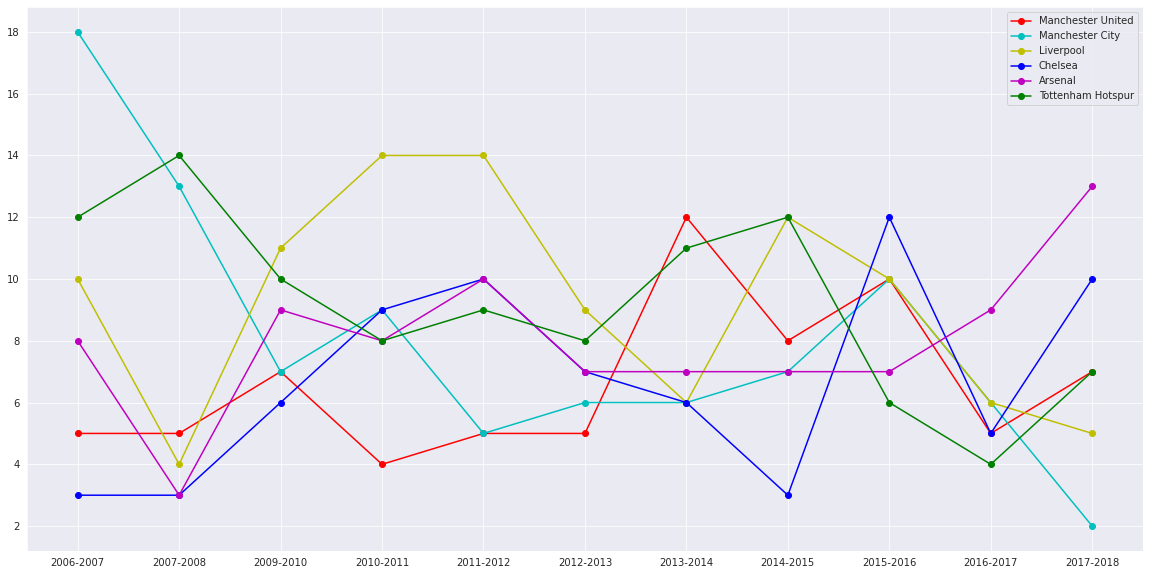

In [ ]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.plot(manu_df.losses, 'r-o')
plt.plot(manc_df.losses, 'c-o')
plt.plot(liv_df.losses, 'y-o')
plt.plot(che_df.losses, 'b-o')
plt.plot(ars_df.losses, 'm-o')
plt.plot(tot_df.losses, 'g-o')
plt.legend(['Manchester United','Manchester City','Liverpool','Chelsea','Arsenal','Tottenham Hotspur'])

If one actually views this graphic in conjunction with the previous one, he would reach the conclusion that Manchester City emerged as the most successful team at the end of the decade. It has cut down its losses dramatically and as evidenced in the previous graphic, adopted a winning mentality that has allowed it to maximise its wins. 
#### To test this theory we can look at another metric: Economy of wins. 

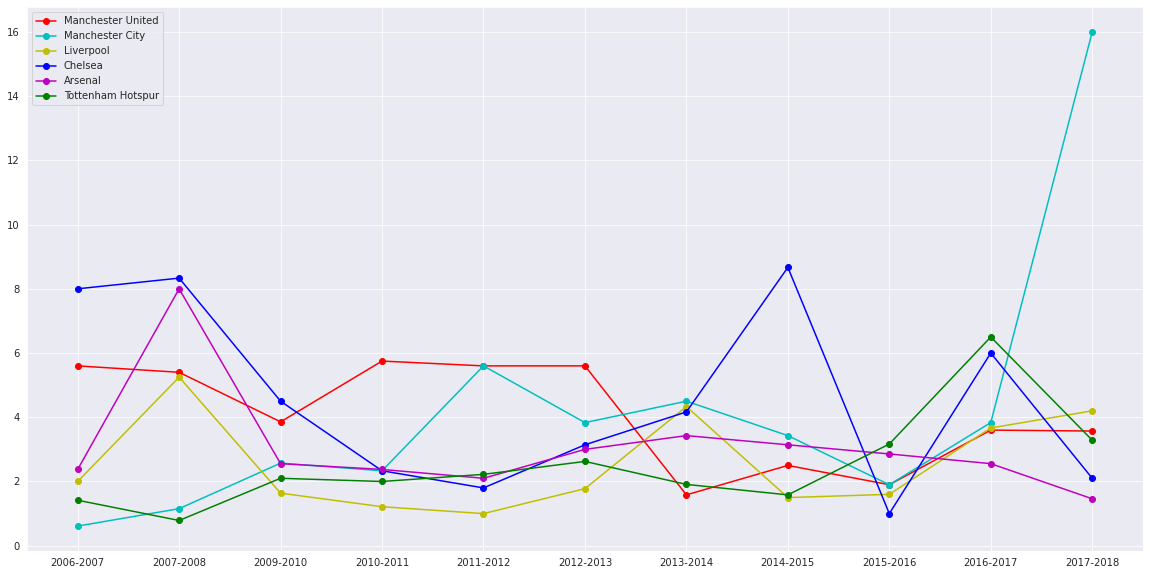

In [ ]:
manu_df['Economy of win']=manu_df.wins/manu_df.losses
manc_df['Economy of win']=manc_df.wins/manc_df.losses
liv_df['Economy of win']=liv_df.wins/liv_df.losses
che_df['Economy of win']=che_df.wins/che_df.losses
ars_df['Economy of win']=ars_df.wins/ars_df.losses
tot_df['Economy of win']=tot_df.wins/tot_df.losses
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.plot(manu_df['Economy of win'], 'r-o')
plt.plot(manc_df['Economy of win'], 'c-o')
plt.plot(liv_df['Economy of win'], 'y-o')
plt.plot(che_df['Economy of win'], 'b-o')
plt.plot(ars_df['Economy of win'], 'm-o')
plt.plot(tot_df['Economy of win'], 'g-o')
plt.legend(['Manchester United','Manchester City','Liverpool','Chelsea','Arsenal','Tottenham Hotspur'])

This indeed, paints a much clearer picture as there are very few sharp fluctuations. We can confidently say:
- Chelsea dominated the EPL at the beginning of the period from 2006-07 to 2009-10.
- Manchester United after a spending a fair time at the top of  the league between 2011 and 2013, had terrible season in 2013-14.
- Manchester City as predicted previously emerged as the dominant player in the League at the end of the period with 16 wins for every loss - a spectacular feat.

### Now we move on to some other plots to determine the attacking and defending prowess of these teams
#### Defending

Here we look at the average goals conceded by each of the Top 6 teams over the relevant period.

<AxesSubplot:xlabel='team', ylabel='goals_conceded'>

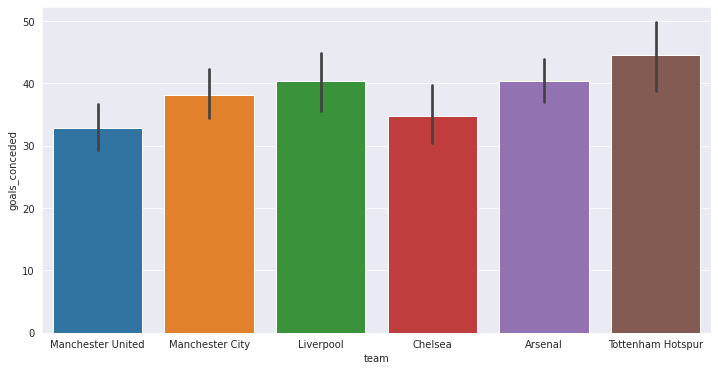

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(top6_df.team,top6_df.goals_conceded)

The vertical bars demonstrate deviation from the mean - in layman's terms, shorter the bar, greater the consistency. The barplot gives us a few pointers that may help us determine the best team from a defensive perspective:
- Tottenham has conceded the most goals. One may conclude that they have the worst defence but let us not get ahead of ourselves. 
- Manchester United has conceded the least goals over the period and they **may** have the best defence among the top 6. Chelsea follows as a close second.
- Arsenal has the shortest bar which implies they have been most consistent but in this case it just means that they have consistently conceded  more goals which is not a great thing to say the least. 

It is important to bear in mind that a team's defence cannot be evaluated merely on the basis of number of goals conceded. Clean sheets are another feature that often help us to evaluate a team's defence. Let us also plot them for better visualisation. 

<AxesSubplot:xlabel='team', ylabel='clean_sheet'>

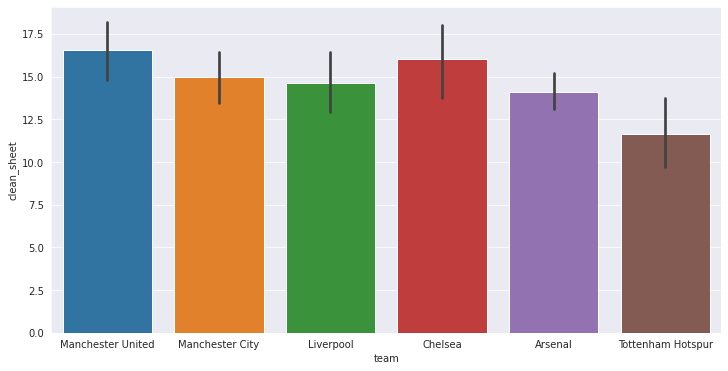

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(top6_df.team,top6_df.clean_sheet)

The observations from this graphic match with our previous observations:
- Tottenham's defence is still the worst performer 
- Manchester United is still better than any of the other top 6 teams at maintaining a clean sheet and Chelsea is still  a close second.
- Arsenal still has a shorter bar meaning better consistency but again, that is not a good thing in this case.
So, one may be tempted to discard this graphic as redundant in light of the previous one. He may argue that if a team has conceded more goals it will have fewer clean sheets and thus by plotting clean sheets separately we are merely inverting the goals conceded barplot. 
However, this may not be the case always as there may be a team that keeps a clean sheet and conceded a ton of goals in alternate matches. So, please don't read too much into the data. 

Let us build a metric called Defence Success Ratio to determine the team that truly has a better defence. We need to account for own goals too in this metric because own goals are often attributed by football pundits, commentators and the like to lax defending. 

<AxesSubplot:xlabel='team', ylabel='own_goals'>

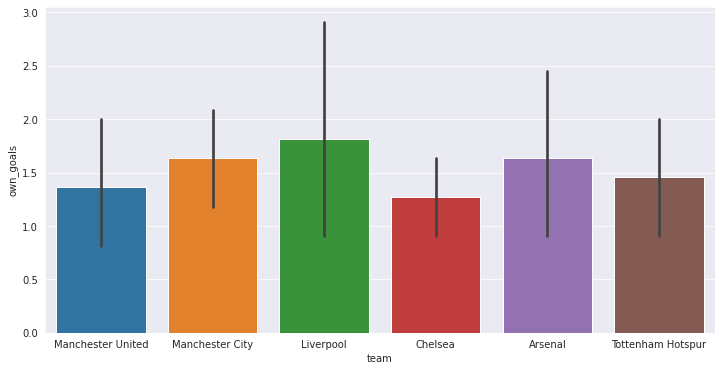

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(top6_df.team,top6_df.own_goals)

This is probably the least helpful graphic of the lot given that there are huge vertical bars signifying immense variation in own goals. However, even this is not completely useless. The high deviation may be an indication of the fact that own goals more often than not are dependent on luck rather than quality of defence or the lack thereof. But, it is important to factor own goals in our metric to gain a faithful assessment of each team's defensive capabilities.

<AxesSubplot:xlabel='team', ylabel='Defence Success Ratio'>

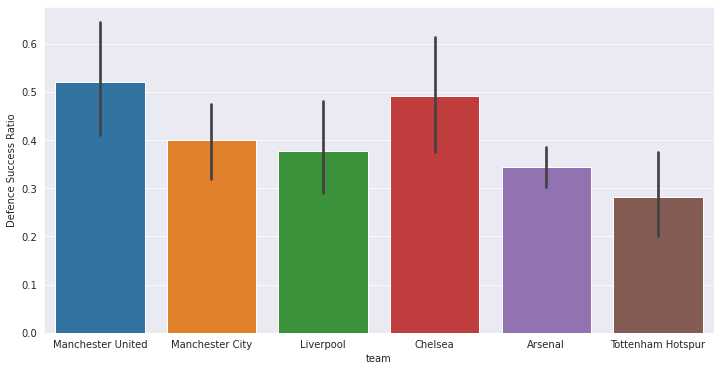

In [ ]:
top6_df['Defence Success Ratio']=(top6_df.clean_sheet/(top6_df.goals_conceded+top6_df.own_goals))
plt.figure(figsize=(12,6))
sns.barplot(top6_df.team,top6_df['Defence Success Ratio'])

It seems like in this case, our hypothesis drawn from the first graphic based on the goals conceded by every team, has been proven to be true by all other relevant measures. So we can conclude that over the relevant period:
- Tottenham indeed had the worst defence while,
- Manchester United had the best

#### Attack

English Football is renowned for quality attacking chances that are created in the blink of an eye and there is nothing better than heatmaps to bring out the vibrancy of attack in EPL.

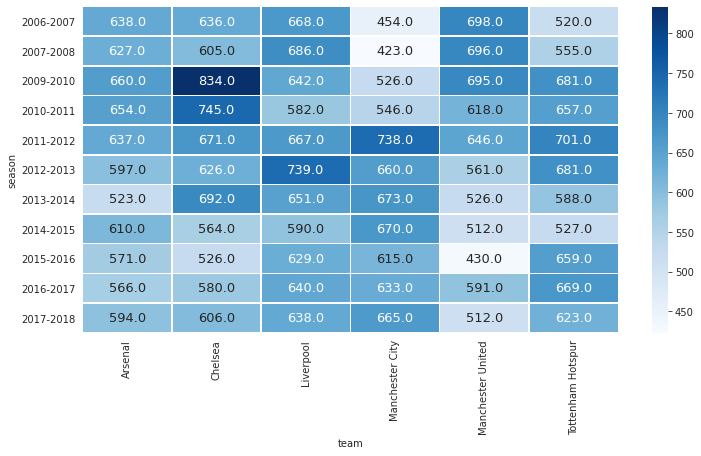

In [ ]:
attack=top6_df.reset_index()
attack=attack.pivot('season','team','total_scoring_att')
plt.figure(figsize=(12,6))
sns.heatmap(attack, 
            annot=True,
            fmt=".1f",
            linewidths=.5, 
            cmap='Blues',
            annot_kws={"fontsize":13});

This beautiful graphic poses some interesting facts:
- It looks like Chelsea in 2009-10 had the most atttacking team which managed 834 attempts to score. 
- Liverpool's attack  seems to be the most consistent - it's attacking stats never dropped below 550 over the period of 11 seasons.
- Manchester United had a bit of a dry spell towards the end of the season while Manchester City followed the polar opposite trajectory. 

But headless attacking is hardly enough to judge a team's attacking prowess. One needs to look at another bit of statistic: **on target attacks**.

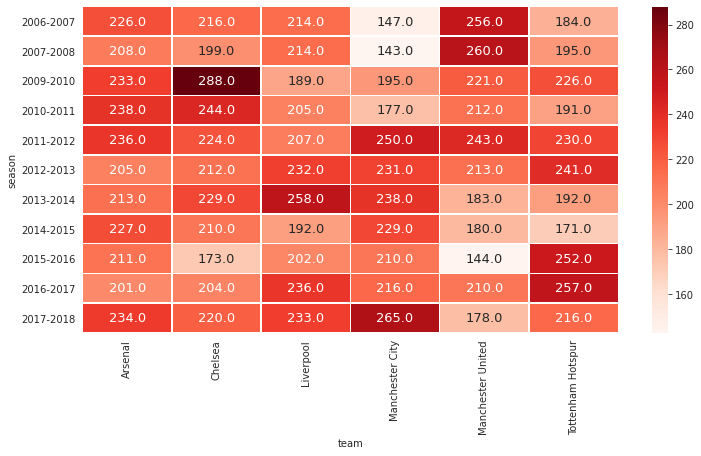

In [ ]:
target_scoring=top6_df.reset_index()
target_scoring=target_scoring.pivot('season','team','ontarget_scoring_att')
plt.figure(figsize=(12,6))
sns.heatmap(target_scoring, 
            annot=True,
            fmt=".1f",
            linewidths=.5, 
            cmap='Reds',
            annot_kws={"fontsize":13});

This graphic shows better contrast between the teams than the previous one, especially in the later years. We can draw the following conclusions from this heatmap:
- Chelsea in 2009-10 created the most chances (as evidenced in the previous graphic) and also had the most on-target attempts
- Arsenal, not Liverpool seems to be the most consistent in terms of on-target shots - never creating less than 200 chances to score. 
- Towards the end of the period Manchester City and Tottenham seem to have dominated the others which is a huge uptick from where they were at the beginning of the period. 

At this point the temptation for calculating an accuracy matrix is too strong to pass so let us go ahead and do it.

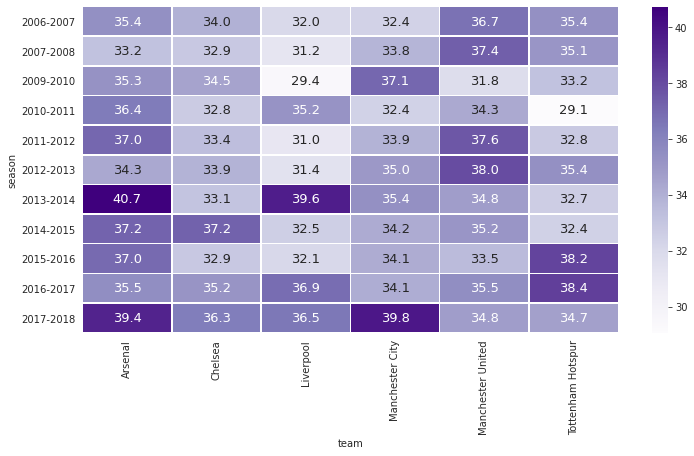

In [ ]:
top6_df['Accuracy']=(top6_df.ontarget_scoring_att/top6_df.total_scoring_att)*100
accuracy=top6_df.reset_index()
accuracy=accuracy.pivot('season','team','Accuracy')
plt.figure(figsize=(12,6))
sns.heatmap(accuracy, 
            annot=True,
            fmt=".1f",
            linewidths=.5, 
            cmap='Purples',
            annot_kws={"fontsize":13});

Some important observations:
- Arsenal at first glance had the best possible accuracy record over the said period - only team to touch 40%.
- Liverpool seems to be the worst  off in terms of accuracy, especially at the beginning of the said period.

At this point I would like to direct your attention to another new metric: **Attack Success Ratio** a simple ratio obtained by dividing goals scored by goals missed.

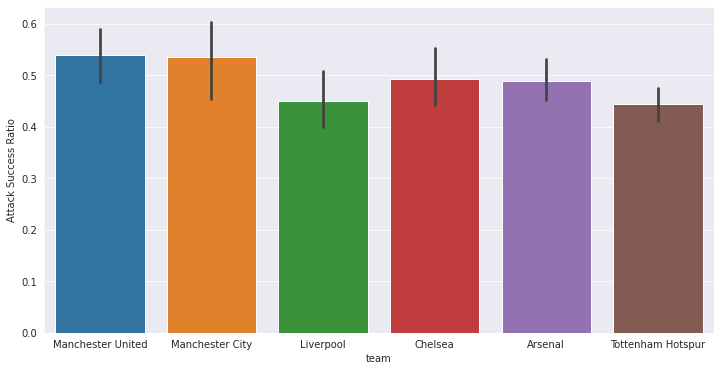

In [ ]:
top6_df['Attack Success Ratio']=(top6_df.goals/(top6_df.ontarget_scoring_att-top6_df.goals))
plt.figure(figsize=(12,6))
sns.barplot(top6_df.team,top6_df['Attack Success Ratio']);

The two Manchester teams seem to have the best goals to misses ratio with United having a lower deviation, while Liverpool and Tottenham have the worst mean ratios with Tottenham having a lower deviation. 

**Caveat: A lower deviation is hardly desirable when a team is performing terribly.**

#### Miscellaneous
Looking at some other data features.

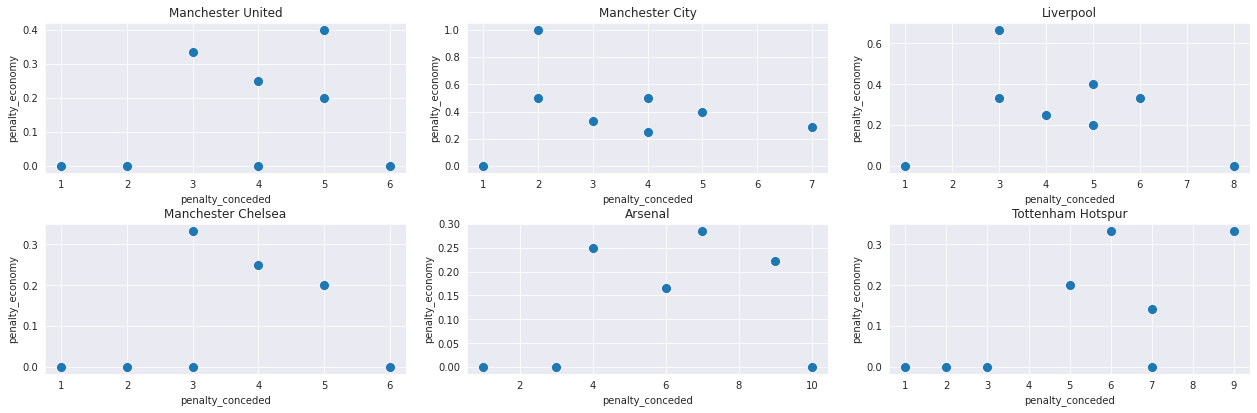

In [ ]:
fig,axes=plt.subplots(2,3, figsize=(18,6))
fig.tight_layout(pad=3)
top6_df['penalty_economy']=top6_df.penalty_save/top6_df.penalty_conceded
axes[0,0].set_title('Manchester United')
sns.scatterplot('penalty_conceded','penalty_economy', data=top6_df[top6_df.team=='Manchester United'], s=100, ax=axes[0,0]);
axes[0,1].set_title('Manchester City')
sns.scatterplot('penalty_conceded','penalty_economy', data=top6_df[top6_df.team=='Manchester City'], s=100, ax=axes[0,1]);
axes[0,2].set_title('Liverpool')
sns.scatterplot('penalty_conceded','penalty_economy', data=top6_df[top6_df.team=='Liverpool'], s=100, ax=axes[0,2]);
axes[1,0].set_title('Manchester Chelsea')
sns.scatterplot('penalty_conceded','penalty_economy', data=top6_df[top6_df.team=='Chelsea'], s=100, ax=axes[1,0]);
axes[1,1].set_title('Arsenal')
sns.scatterplot('penalty_conceded','penalty_economy', data=top6_df[top6_df.team== 'Arsenal'], s=100, ax=axes[1,1]);
axes[1,2].set_title('Tottenham Hotspur')
sns.scatterplot('penalty_conceded','penalty_economy', data=top6_df[top6_df.team=='Tottenham Hotspur'], s=100, ax=axes[1,2]);

Conclusions:
- Tottenham and Arsenal are most likely to incur penalties and fail to save them,
- Manchester City is most likely to save a penalty.

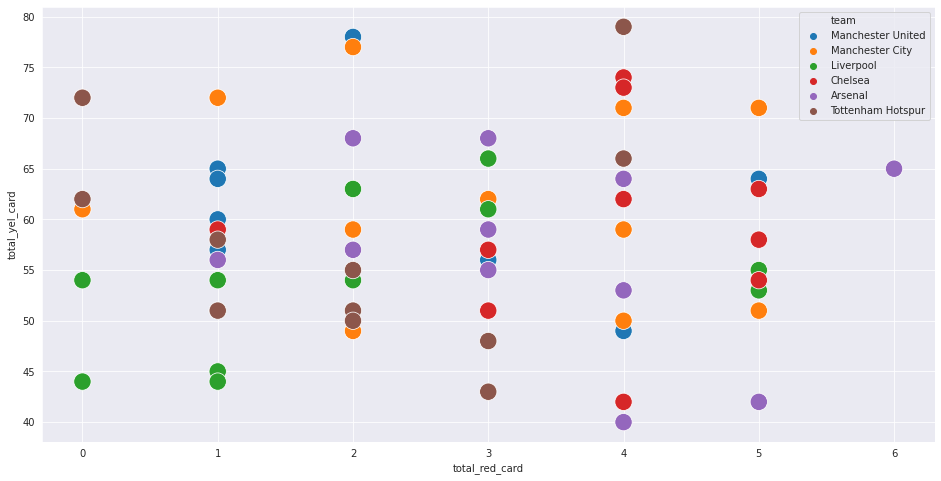

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot('total_red_card','total_yel_card',hue='team',data=top6_df,s=300);

Conclusions:
- Liverpool is least likely to incur a yellow card or a red card on the field.
- Chelsea is most likely to incure a yellow card or a red card on the field

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "shambobasuthakur/the-big-6-of-epl" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/shambobasuthakur/the-big-6-of-epl


'https://jovian.ml/shambobasuthakur/the-big-6-of-epl'

## Asking and Answering Questions
Let us use the tables and the plots to answer some of the questions that have raged on for years now. 

## Which Top-6 Team had the best attack?

In [ ]:
best_attack=top6_df.sort_values('Attack Success Ratio',ascending=False).head(1)
best_attack=best_attack.reset_index()
print('{} from the season {} had the best attack with an attack success ratio of {}.'.format(best_attack['team'][0], best_attack['season'][0], best_attack['Attack Success Ratio'][0]))

Manchester City from the season 2013-2014 had the best attack with an attack success ratio of 0.75.


## Which Top-6 Team had the best defence?

In [ ]:
best_defence=top6_df.sort_values('Defence Success Ratio', ascending=False).head(1)
best_defence=best_defence.reset_index()
print('{} from the season {} had the best defence with a defence success ratio of {:0.2f}.'.format(best_defence['team'][0],best_defence['season'][0],best_defence['Defence Success Ratio'][0]))

Manchester United from the season 2007-2008 had the best defence with a defence success ratio of 0.95.


## Which Top-6 Team was the most attacking and which one was the most defensive?
We shall try to tackle this question by taking a ratio of the Attack Success Ratio and the Defence Success Ratio. A higher ratio would indicate greater reliance on the team's attacking players and vice versa.

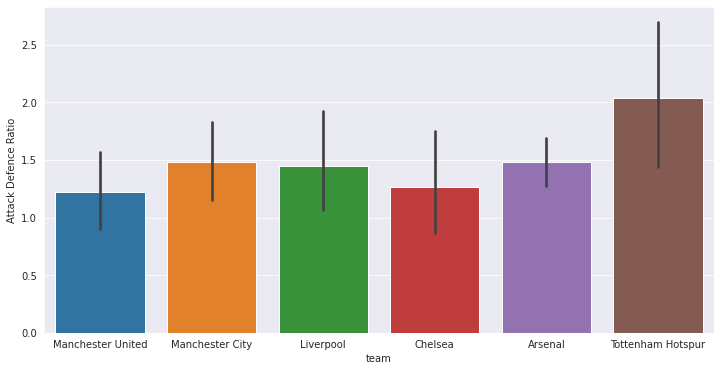

In [ ]:
top6_df['Attack Defence Ratio']=top6_df['Attack Success Ratio']/top6_df['Defence Success Ratio']
plt.figure(figsize=(12,6))
sns.barplot(top6_df.team,top6_df['Attack Defence Ratio']);

Clearly, Tottenham is the most attacking team while Manchester United seems to be the most defensive.

In [ ]:
most_attacking=top6_df.sort_values('Attack Defence Ratio', ascending=False).head(1).reset_index()
most_defensive=top6_df.sort_values('Attack Defence Ratio', ascending=True).head(1).reset_index()
print('{} from the season {} was the most attacking team while {} from the season {} was  the most defensive team'.format(most_attacking['team'][0],most_attacking['season'][0],most_defensive['team'][0],most_defensive['season'][0]))

Tottenham Hotspur from the season 2006-2007 was the most attacking team while Manchester United from the season 2007-2008 was  the most defensive team


## Which team should you bet on?
We analyse which team is most likely to score while conceding the least goals.

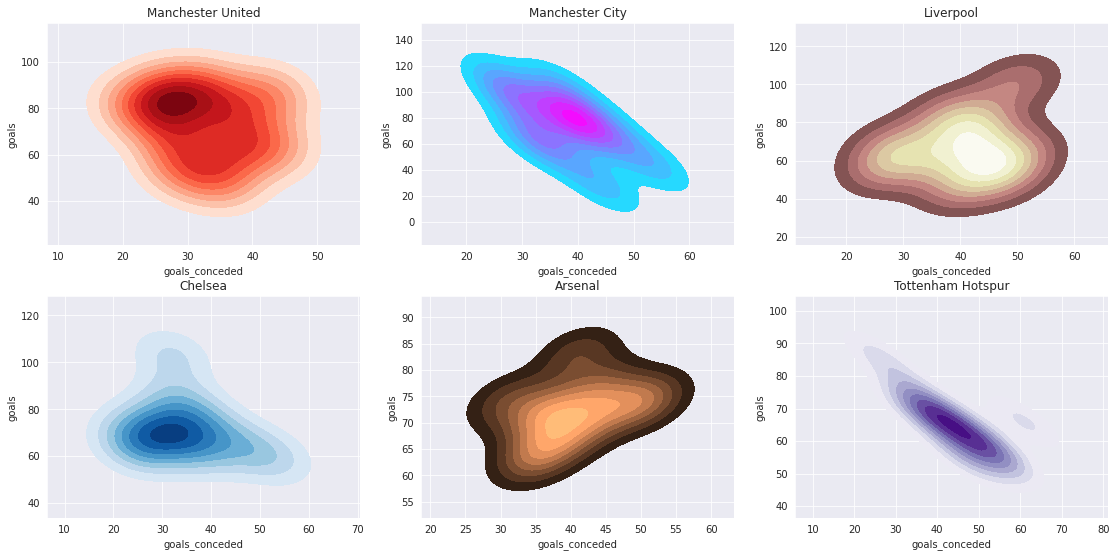

In [ ]:
fig,axes=plt.subplots(2,3,figsize=(16,8))
fig.tight_layout(pad=3)
axes[0,0].set_title('Manchester United')
sns.kdeplot(manu_df.goals_conceded, manu_df.goals,shade=True,cmap='Reds',shade_lowest=False, ax=axes[0,0]);
axes[0,1].set_title('Manchester City')
sns.kdeplot(manc_df.goals_conceded, manc_df.goals,shade=True,cmap='cool',shade_lowest=False, ax=axes[0,1]);
axes[0,2].set_title('Liverpool')
sns.kdeplot(liv_df.goals_conceded, liv_df.goals,shade=True,cmap='pink',shade_lowest=False, ax=axes[0,2]);
axes[1,0].set_title('Chelsea')
sns.kdeplot(che_df.goals_conceded, che_df.goals,shade=True,cmap='Blues',shade_lowest=False, ax=axes[1,0]);
axes[1,1].set_title('Arsenal')
sns.kdeplot(ars_df.goals_conceded, ars_df.goals,shade=True,cmap='copper',shade_lowest=False, ax=axes[1,1]);
axes[1,2].set_title('Tottenham Hotspur')
sns.kdeplot(tot_df.goals_conceded, tot_df.goals,shade=True,cmap='Purples',shade_lowest=False, ax=axes[1,2]);

From the above subplots we can infer that over all the seasons, Manchester United is more likely to score while defending its own goalbox. So we can say that over the years, Machester United had the best track record.

## Which team had the best strikers/attacking formation?
As accuracy is the hallmark of a good attacking formation, we shall use the accuracy metric to decide this question.
Caveat: Not all attacking chances are created by strikers but most of them are so it is withing the bounds of reasonable assumption that the team with the best striker will have the highest accuracy. 

In [ ]:
best_str=top6_df.sort_values('Accuracy', ascending = False).head(1).reset_index()
print('{} from the season {} had the best strikers/attacking formation with {:0.2f}% of all shots being on target.'.format(best_str['team'][0],best_str['season'][0],best_str['Accuracy'][0]))

Arsenal from the season 2013-2014 had the best strikers/attacking formation with 40.73% of all shots being on target.


## Which team had the best goalkeeper?

In [ ]:
best_gk=top6_df.sort_values('penalty_economy', ascending=False).head(1).reset_index()
print('{} from the season {} had the best goal keeper who saved {:.0f} goal for every penalty conceded'.format(best_gk['team'][0],best_gk['season'][0],best_gk['penalty_economy'][0]))

Manchester City from the season 2017-2018 had the best goal keeper who saved 1 goal for every penalty conceded


## Which Top 6 team was most aggressive on the field?
We are trying to look at their foul stats to find the team that is most likely to incur a foul on a playing field.

In [ ]:
top6_df['avg_foulplay']=(top6_df['total_red_card']+top6_df['total_yel_card'])/38
dirty_play=top6_df.sort_values('avg_foulplay',ascending=False).head(1).reset_index()
print('{} from the season {} was the most aggressive team with an average of {:.1f} cards per game'.format(dirty_play['team'][0],dirty_play['season'][0],dirty_play['avg_foulplay'][0]))

Tottenham Hotspur from the season 2014-2015 was the most aggressive team with an average of 2.2 cards per game


In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "shambobasuthakur/the-big-6-of-epl" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/shambobasuthakur/the-big-6-of-epl


'https://jovian.ml/shambobasuthakur/the-big-6-of-epl'

## Inferences and Conclusion

Most relevant inferences have been mentioned below the relevant visualisation graphics. In this section I have tried to bring my project to a logical conclusion.

At the end of the period, we saw Manchester City take an insurmountable lead over others in terms of win economy. They had maximised their wins and minimised their losses over the 12 sseason period. 

However, if we the enitre period with the 11 seasons taken altogether, Manchester United presents a much bolder face. It has the best defence and attacking ratios. Although at the the end of the period we saw a slump in its performance, data dictates that Manchester United is a reliable team that can defend its side while scoring goals.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "shambobasuthakur/the-big-6-of-epl" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/shambobasuthakur/the-big-6-of-epl


'https://jovian.ml/shambobasuthakur/the-big-6-of-epl'